# Car Insurance Data Analysis

## Exploratory Data Analysis


**Exploratory Data Analysis (EDA)** is a crucial step in any data engineering and anlytics project to understand the dataset before performing further analysis. It involves summarizing key characteristics and visualizing data patterns, outliers, and trends.

**Step 1. Understand the Data Structure**
- **Data loading**: First, load the dataset and examine its structure.

- **Check the dimensions**: Find the number of rows and columns.

- **Look at the first few records**: Get a sample of the dataset.


In [21]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

Load the car insurance dataset

In [22]:
# Import load_data function from scripts
from load_data import load_data

# read the dataset 

data = load_data('../data.zip', filename='MachineLearningRating_v3.txt')

In [23]:
# Explore the first few rows
data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [24]:
# Find the number of rows and columns
data.shape

(1000098, 52)

The dataset has 100,0098 rows and 52 columns

**Data Cleaning:**

- Handle missing or incomplete data: Since the dataset spans several categories, some fields may have missing values. 


In [25]:
# Import the Class to data processing

from data_processing import DataProcessing
# Create instance of the class
data_processing = DataProcessing(data)

# Summary of Missing data
missing_summary = data_processing.missing_data_summary()

# Display results
missing_summary

,Missing Count,Percentage (%)
NumberOfVehiclesInFleet,1000098,100.000000
CrossBorder,999400,99.930207
CustomValueEstimate,779642,77.956560
Converted,641901,64.183810
Rebuilt,641901,64.183810
WrittenOff,641901,64.183810
NewVehicle,153295,15.327998
Bank,145961,14.594670
AccountType,40232,4.022806
Gender,9536,0.953507


**Drop Columns with High Missing Data:**
- Columns with high missing values offer little analytical value.

**Dropped Columns**

- `NumberOfVehiclesInFleet` (100% missing)
- `CrossBorder` (~99.93%)
- `CustomValueEstimate` (~77.96%)
- `Converted, Rebuilt, WrittenOff` (~64.18%)


In [26]:
cols_to_drop = ['NumberOfVehiclesInFleet', 
                'CrossBorder', 
                'CustomValueEstimate', 
                'Converted', 'Rebuilt', 
                'WrittenOff']

# Drop these columns
data = data_processing.handle_missing_data('high', cols_to_drop)


**Impute Moderate Missing Data:**
- Imputation preserves useful information, using the mode for categorical and median for numerical columns.

**Imputed Columns:**

- `NewVehicle` (~15.33%)
- `Bank` (~14.59%)
- `AccountType` (~4.02%)

In [27]:
# Impute or drop columns with moderate missing data
missing_cols = ['NewVehicle', 'Bank', 'AccountType']
data = data_processing.handle_missing_data('moderate', missing_cols)

**Handle Low Missing Data - Standard Imputation**

- These columns can be reasonably imputed without affecting data quality.

**Imputed Columns:**

- `Gender` (~0.95%)
- `MaritalStatus` (~0.83%)
- `Various vehicle-related columns (~0.055% each): `Cylinders, CubicCapacity, Kilowatts`, etc.
 


In [28]:
# Handle low missing data (standard imputation)
missing_cols = ['Gender', 'MaritalStatus', 'Cylinders', 'cubiccapacity', 
                'kilowatts', 'NumberOfDoors', 'VehicleIntroDate', 'Model', 
                'make', 'VehicleType', 'mmcode', 'bodytype', 'CapitalOutstanding']

data = data_processing.handle_missing_data('low', missing_cols)


**Overall Decision Summary:**

- High missing data: Dropped.

- Moderate missing data: Imputed with mode (categorical) or median (numerical).

- Low missing data: Imputed to avoid unnecessary data loss.

**Summarize Key Statistics**

- **Descriptive statistics:**
    - In the descriptive statistics calculate and examine the variability for numerical features such as TotalPremium, TotalClaim, etc.


In [29]:
# Statistic summary of numerical features
num_cols = ['SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']
display(data[num_cols].describe())

,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


**Insights:**
- **Skewness**: The data for all columns is highly skewed with a long tail of high values (especially for `SumInsured`, `CalculatedPremiumPerTerm`, `TotalPremium`, and `TotalClaims`). The mean values are much higher than the medians, which implies a small number of high-value policies and premiums influence the average.

- **Outliers**: Significant outliers exist, particularly in `TotalPremium` and `TotalClaims`, where negative values could indicate refunds or adjustments, while high values drive the average up.

- **Majority of Policies**: The majority of policies have small insured sums, low premiums, and zero claims, as indicated by the 50th and 75th percentiles being much lower than the maximum values.

These insights suggest that a large proportion of the policies are low in terms of both insured amounts and premiums, while a small number of high-value policies dominate the high-end of the distributions.

**Data Structure Review:**

It's important to review the data types to ensure that:

- **Numerical Columns** are in the correct numeric format (int, float).
- **Categorical Variables (e.g., Gender, PolicyType)** are encoded as categories or objects.
- **Dates** are formatted as datetime for proper time-series analysis.

In [30]:
# Check the Data types of each column

data_types = data.dtypes

data_types.reset_index(name='data type')

,index,data type
0,UnderwrittenCoverID,int64
1,PolicyID,int64
2,TransactionMonth,object
3,IsVATRegistered,bool
4,Citizenship,object
5,LegalType,object
6,Title,object
7,Language,object
8,Bank,object
9,AccountType,object


Since the `VehicleIntroDate` column is of type object, it should be transformed into a proper date format (datetime). This transformation is essential for performing time-based analysis or working with date-related features effectively.

In [31]:
# Converts the VehicleIntroDate column from object to datetime format.

data['VehicleIntroDate'] = pd.to_datetime(data['VehicleIntroDate'], format='%d/%m/%Y', errors='coerce')  # Convert with error handling

**Univariate Analysis:**

- **Distribution of Variables:** Plot histograms for numerical columns and bar charts for categorical columns to understand distributions..


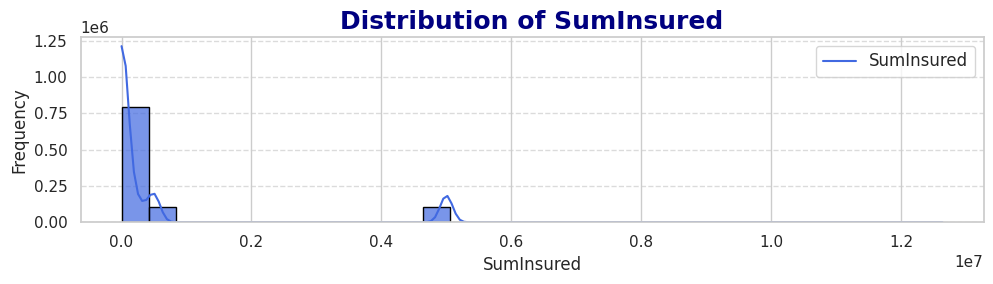

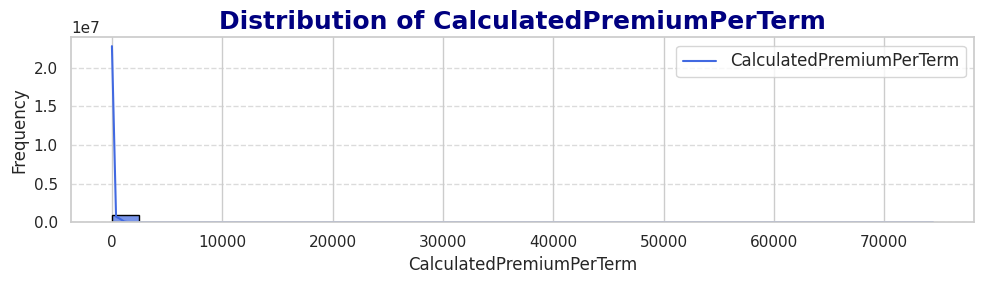

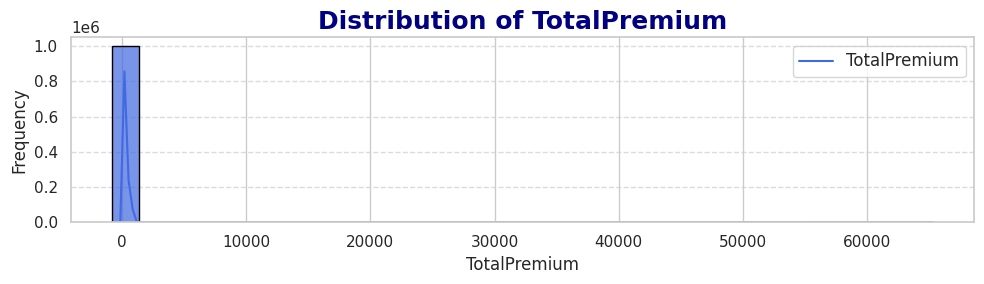

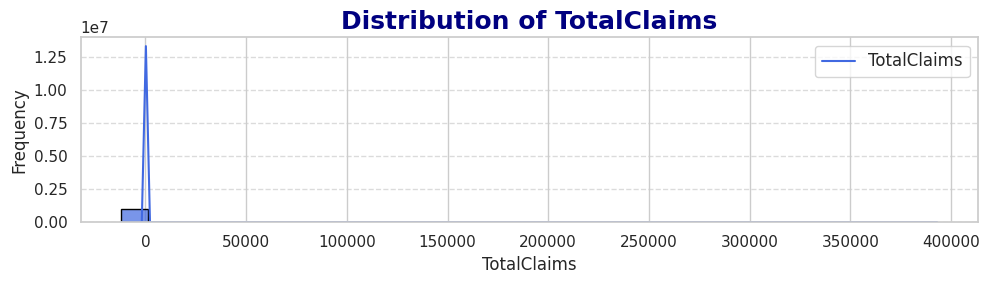

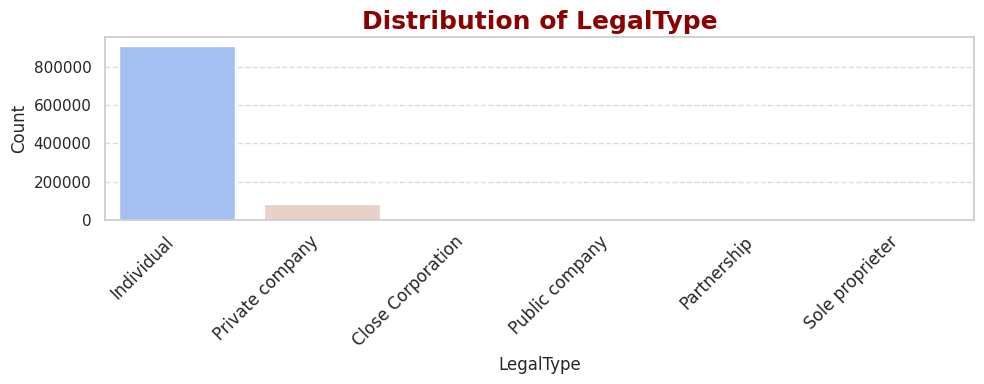

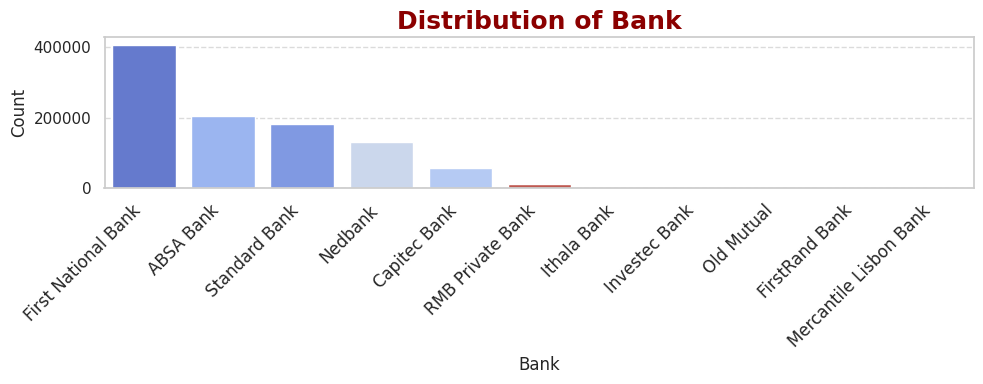

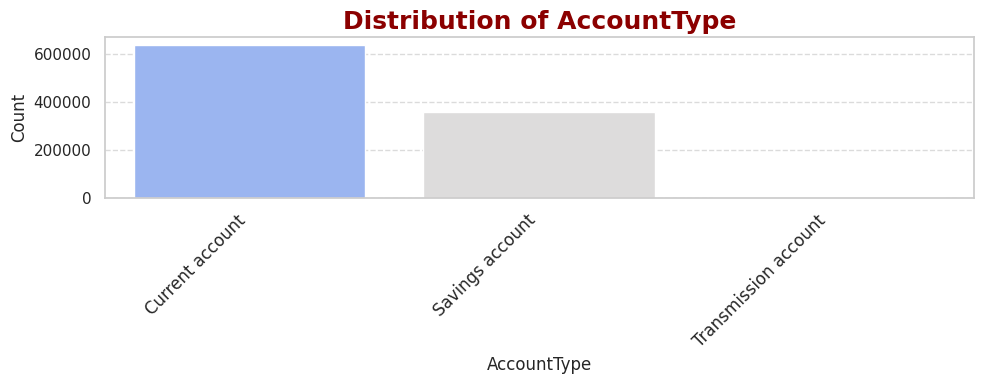

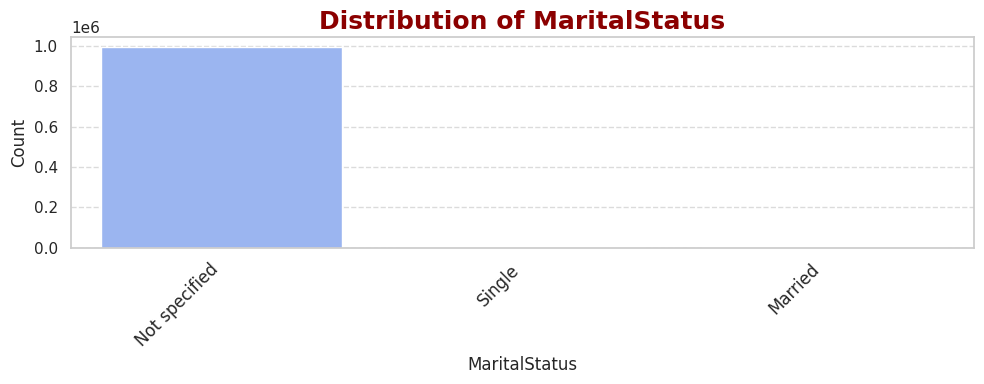

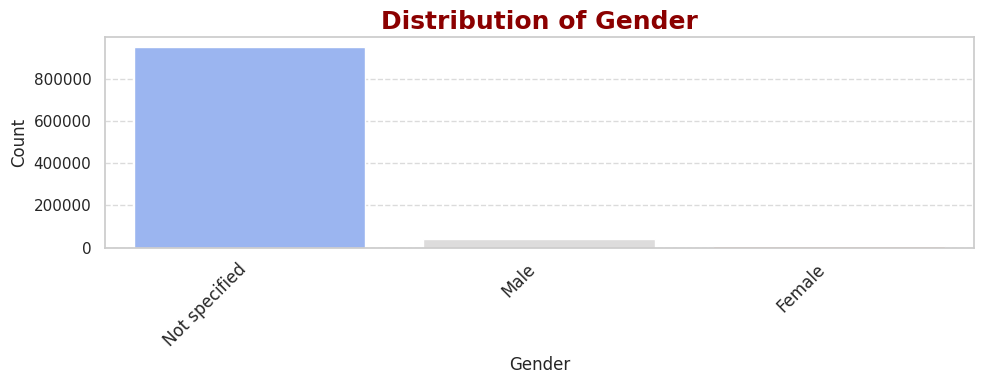

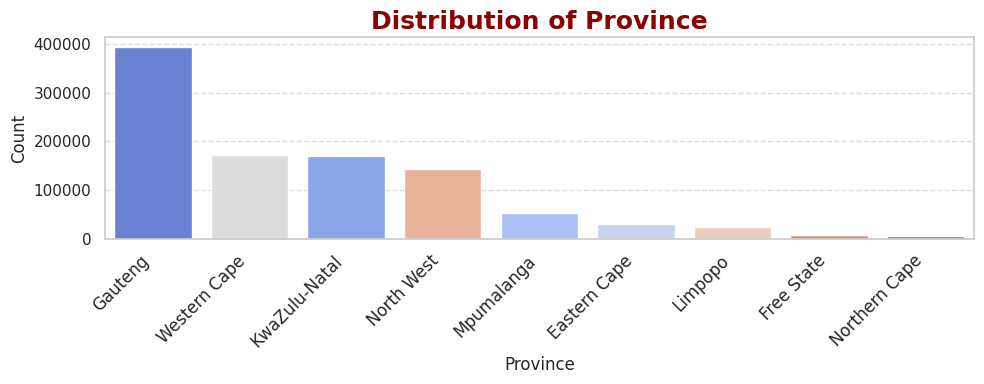

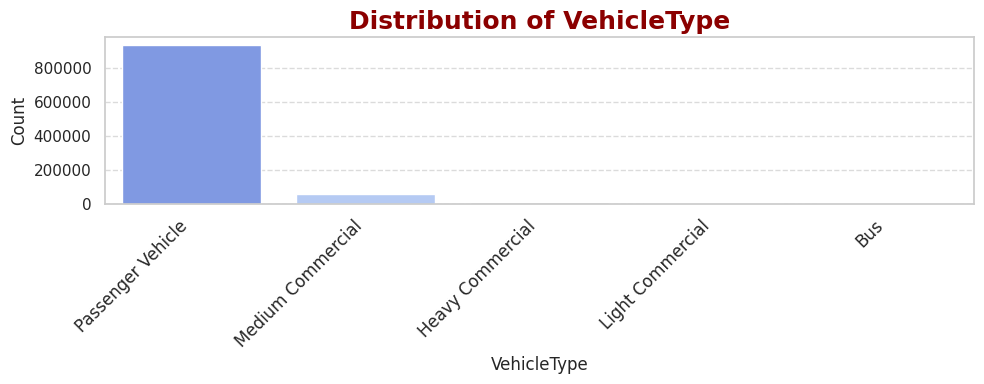

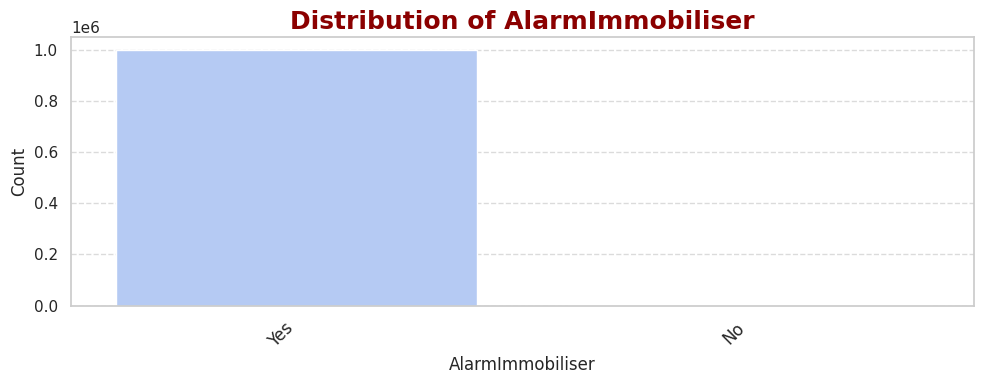

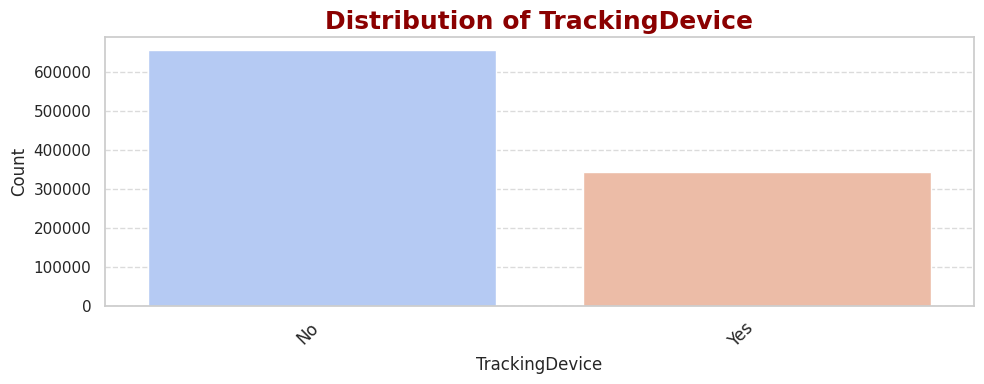

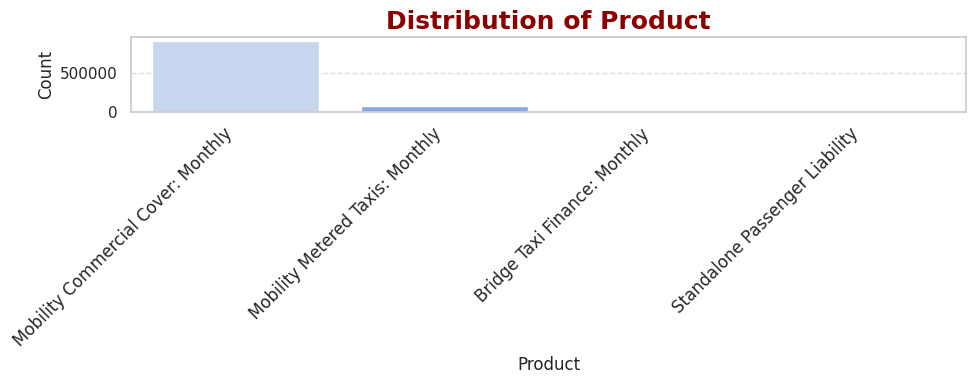

In [32]:
# Import visualizer
from data_visualization import DataVisualizer
# Create instance of the class
vis = DataVisualizer(data)

# Define numerical columns
numerical_cols = [
    'SumInsured', 'CalculatedPremiumPerTerm', 
    'TotalPremium', 'TotalClaims'
]
# Define categorical columns
categorical_cols = [
    'LegalType', 'Bank', 'AccountType', 'MaritalStatus', 
    'Gender', 'Province', 'VehicleType', 
    'AlarmImmobiliser', 'TrackingDevice', 
    'Product'
]

# Plot the plot of both numerical and categorical columns
vis.univariate_analysis(numerical_cols, categorical_cols)

**Insights from Univariate Analysis**

**Numerical Variables:**

- **Sum Insured: **The distribution is right-skewed, with most policies having lower sums insured and a few with very high amounts. This indicates a diverse range of policy values, with clusters around specific sums suggesting potential policy tiers.

- **Calculated Premium Per Term:** This variable is also right-skewed, with a peak around a specific amount and variability in premiums. The presence of significantly higher premiums reflects pricing differences among policies.

- **Total Premium:** The distribution is right-skewed, with most policies showing lower total premiums and a peak around zero. High total premiums may be due to refunds or high-risk factors.

Overall, these distributions reveal a wide range of policy values and premiums, with identifiable clusters and outliers that can aid in risk assessment and pricing strategies.

**Categorical Variables:**

- **Legal Type:** Most policies are issued to individuals, indicating a focus on personal insurance. Private companies and close corporations have fewer policies, with public companies, partnerships, and sole proprietorships being even less common.

- **Marital Status:** A significant portion of data has "Not specified" for marital status, suggesting incomplete information. Single and married individuals are less represented, highlighting potential issues with data collection or privacy concerns.

- **Province:** Gauteng has the highest number of policies, with Western Cape and KwaZulu-Natal showing moderate numbers. Other provinces have fewer policies, indicating a concentration of market presence in specific regions.

- **Vehicle Type:** Passenger vehicles dominate, with fewer policies for commercial vehicle types (medium, heavy, light, and bus). This underscores the company's focus on passenger vehicles.

- **Gender:** A substantial portion of data has "Not specified" for gender, indicating missing information. Male and female categories are present but less common, suggesting potential gaps in data collection or reporting.

**Bivariate or Multivariate Analysis:**

- **Correlations and Associations:** Explore relationships between the monthly changes `TotalPremium` and `TotalClaims` as a function of ZipCode, using scatter plots and correlation matrices.


/home/noh/10Academy/Car-Insurance-Risk-Analysis-and-Premium-Optimization/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


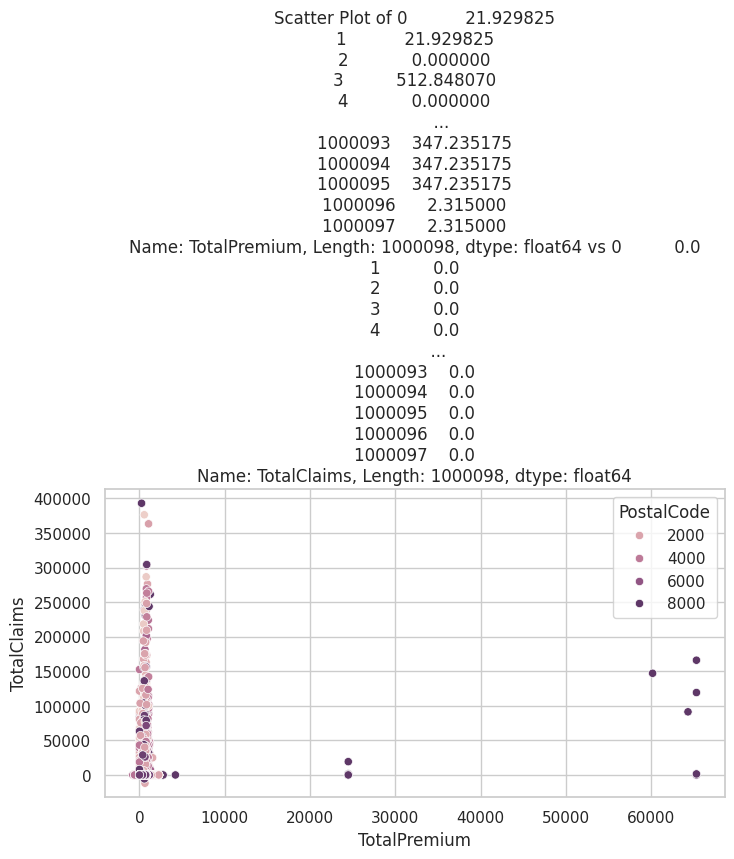

In [33]:
# Define x and y column
x_col = data['TotalPremium']
y_col = data['TotalClaims']
col_hue = data['PostalCode']

# Plot scatter plot
vis.scatter_plot(x_col, y_col, col_hue)

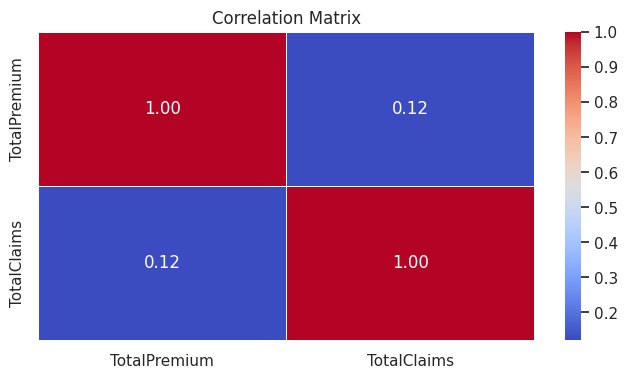

In [34]:
# Compute correlation matrix
cols = ['TotalPremium', 'TotalClaims']

vis.correlation_matrix(cols)

**Data Comparison**

- **Trends Over Geography:** Compare the change in insurance cover type, premium, auto make, etc. 

/home/noh/10Academy/Car-Insurance-Risk-Analysis-and-Premium-Optimization/scripts/data_visualization.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PostalCode', y='TotalPremium', data=agg_data, palette='Set3')


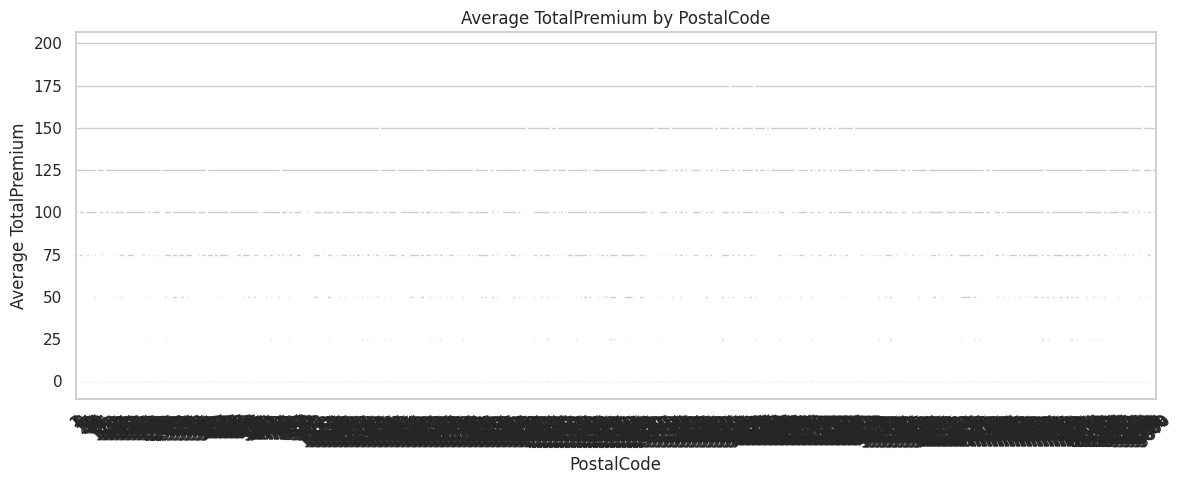

In [35]:
# Plot trends over geographical location
vis.plot_trends_by_geography()

**Outliers and Box Plot Detection**

Outliers are data points that deviate significantly from the majority of the dataset, often indicating variability or errors in data collection. They can distort statistical analyses and affect model performance if not handled properly.

The Box Plot is a powerful tool for visualizing outliers. It displays the distribution of a dataset based on five summary statistics: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. Outliers are identified as points that fall below the lower bound or above the upper bound, calculated using the Interquartile Range (IQR) method:

- IQR = Q3 - Q1
- Lower Bound = Q1 - 1.5 * IQR
- Upper Bound = Q3 + 1.5 * IQR

Points outside this range are potential outliers and can be further examined to determine their impact on the analysis.


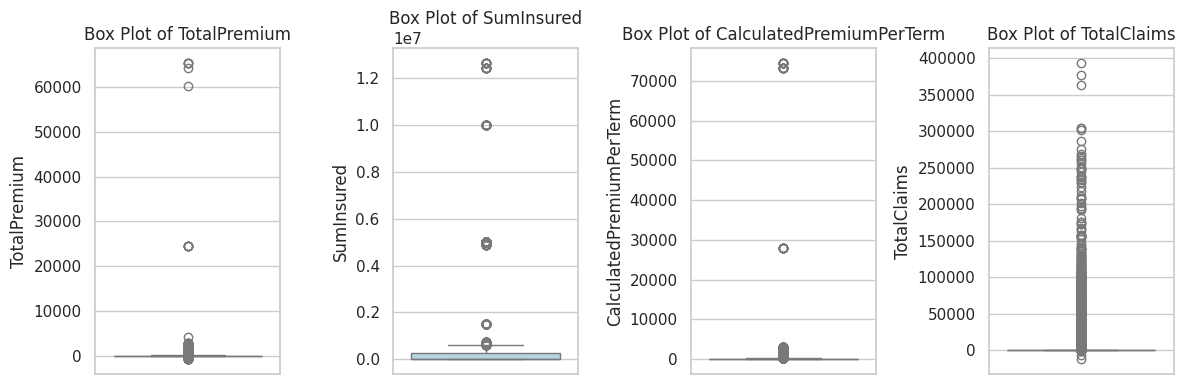

In [36]:
# Define numerical columns to detect outliers
numerical_cols = ['TotalPremium', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalClaims']
# Detect outliers using boxplot
vis.plot_outliers_boxplot(numerical_cols)

**Insights and Decisions**

**1. TotalPremium:**

- **Insight**: The box plot shows there are a few outliers on the higher end of the data points.

**2. SumInsured:**

- **Insight**: The box plot shows a few extreme outliers, significantly higher than the main data range, especially above the 1.2e7 mark.


**3. CalculatedPremiumPerTerm:**

- **Insight**: The box plot highlights a few significant outliers, especially around the 70,000 mark, far removed from the core data.

**4. TotalClaims:**

- **Insight**: Several extreme outliers, particularly those above 100,000, are present, indicating a high variance that could mislead future analysis. The median is around 100,000.
There are a few outliers on the higher end.


**Conclusion:**
The analysis of box plots highlights outliers in numerical values of the selected variables. To address these issues:

Capping outliers is the preferred approach to retain most data while minimizing distortion.


In [37]:
# Capping outliers of the numerical variables

df_capped = vis.cap_all_outliers(numerical_cols)


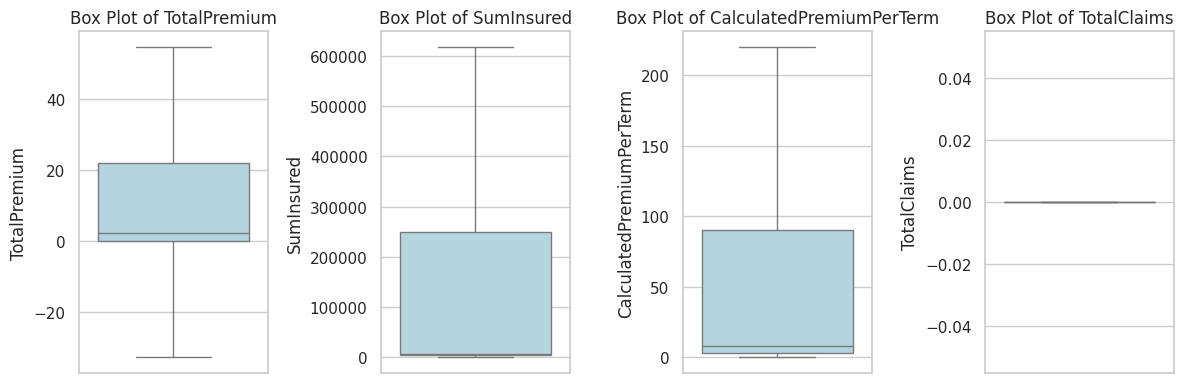

In [38]:
# Check outliers after the outliers were capped
vis1 = DataVisualizer(df_capped)
vis1.plot_outliers_boxplot(numerical_cols)

Capping outliers has resulted in more balanced distributions, which can prevent skewness and help with more accurate analyses. The capping approach preserves the integrity of the data while addressing the extreme values without fully removing them.